## Examining the MetaData

In [1]:
import pandas as pd

# Replace 'file_path' with the path to your data file
file_path = 'Dataset/GSE206125/GSE206125_kuramochi_C_to_T320_metadata_g1.tsv'

# Load the metadata file with tab-separated values
metadata_df = pd.read_csv(file_path, sep='\t')

# Display the columns to understand the structure
print("Columns in the metadata file:")
print(metadata_df.columns)

# Display a sample of the data to inspect the first few rows
print("\nSample rows of the metadata file:")
print(metadata_df.head())

# Check unique values in 'orig.ident'
if 'orig.ident' in metadata_df.columns:
    unique_orig_ident = metadata_df['orig.ident'].unique()
    print("\nUnique values in 'orig.ident':")
    print(unique_orig_ident)
else:
    print("\nColumn 'orig.ident' not found in the metadata file. Please check column names.")

# Count the distribution of samples across unique 'orig.ident' values
if 'orig.ident' in metadata_df.columns:
    print("\nDistribution of samples by 'orig.ident':")
    print(metadata_df['orig.ident'].value_counts())
else:
    print("\nCannot count 'orig.ident' as the column does not exist.")
print((metadata_df['State'].unique()))
metadata_df.groupby('orig.ident')['State'].value_counts()


Columns in the metadata file:
Index(['cell', 'nGene', 'nUMI', 'orig.ident', 'percent.mito', 'State'], dtype='object')

Sample rows of the metadata file:
               cell  nGene   nUMI orig.ident  percent.mito State
0  bc_ctrlI_169.010   4499  17336          C      0.145362     C
1  bc_ctrlI_046.133   4721  17625          C      0.116369     C
2  bc_ctrlI_229.167   4283  16133          C      0.149817     C
3  bc_ctrlI_018.061   4379  17430          C      0.098566     C
4  bc_ctrlI_341.113   4700  16969          C      0.112381     C

Unique values in 'orig.ident':
['C' 'T1' 'T2.5' 'T5' 'T10' 'T20' 'T40' 'T80' 'T160' 'T320']

Distribution of samples by 'orig.ident':
orig.ident
T160    1348
T1      1223
T10     1030
T40      918
T80      910
T2.5     760
T20      640
T320     560
C        453
T5       398
Name: count, dtype: int64
['C' 'S1' 'S2' 'S3' 'S4' 'S5']


orig.ident  State
C           C         453
T1          S1       1223
T10         S2        688
            S4        196
            S3        146
T160        S5       1348
T2.5        S1        626
            S2        134
T20         S2        417
            S3        149
            S4         74
T320        S5        560
T40         S4        697
            S3        221
T5          S2        215
            S1        183
T80         S4        838
            S3         72
Name: count, dtype: int64

## PLotting to find the Outliers and Unwanted nUMI, nGene and percent.mito

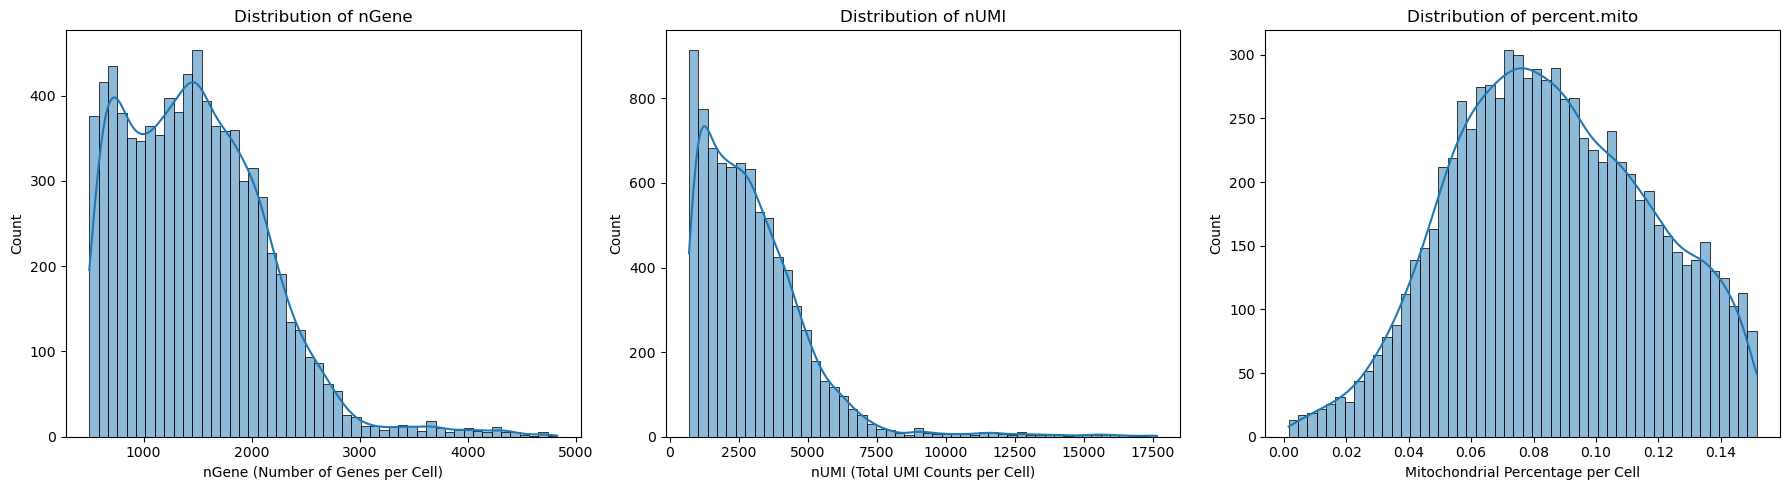

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the metadata
file_path = 'Dataset/GSE206125/GSE206125_kuramochi_C_to_T320_metadata_g1.tsv'  # Update this path
metadata_df = pd.read_csv(file_path, sep='\t')

# Set up figure layout
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot Histogram of nGene
sns.histplot(metadata_df['nGene'], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Distribution of nGene")
axes[0].set_xlabel("nGene (Number of Genes per Cell)")

# Plot Histogram of nUMI
sns.histplot(metadata_df['nUMI'], bins=50, kde=True, ax=axes[1])
axes[1].set_title("Distribution of nUMI")
axes[1].set_xlabel("nUMI (Total UMI Counts per Cell)")

# Plot Histogram of percent.mito
sns.histplot(metadata_df['percent.mito'], bins=50, kde=True, ax=axes[2])
axes[2].set_title("Distribution of percent.mito")
axes[2].set_xlabel("Mitochondrial Percentage per Cell")

plt.tight_layout()
plt.show()


### 1️⃣ nGene (Number of Genes Detected per Cell)

Most cells have 500-2500 detected genes, with a long tail extending to ~5000.

Sharp drop-off beyond ~3500 genes, suggesting potential doublets (two cells merged into one during capture).

A few very low-gene-count cells (~200 genes), likely empty droplets or dead cells.

📌 Filter:

Remove cells with nGene < 200 (likely empty droplets).
Remove cells with nGene > 4000 (likely doublets).

### 2️⃣  nUMI (Total UMI Counts per Cell)

Most cells have 1000-5000 UMI counts.

Some extreme values (~15,000+) are likely doublets or over-sequenced cells.

A sharp peak at very low UMI counts suggests the presence of low-quality cells or empty droplets.

📌Filter:

Remove cells with nUMI < 500 (likely low-quality).

Remove cells with nUMI > 15,000 (possible doublets or over-sequencing).

### 3️⃣ percent.mito (Mitochondrial RNA Fraction)

Most cells fall between 5-12% mitochondrial RNA.

A gradual decline starts beyond 12%, with a sharper drop beyond 15%.

Very few cells exceed 15%, suggesting apoptosis or stress.

📌 Filter:

Keep cells with percent.mito < 15%.
Remove cells with percent.mito > 15% (likely stressed or apoptotic).

## FIltering on Basis of PLot

In [3]:
# Define filtering thresholds
min_genes = 200
max_genes = 4000
min_umi = 500
max_umi = 15000
max_mito = 0.15  # 15%

# Apply the filters
filtered_metadata = metadata_df[
    (metadata_df['nGene'] > min_genes) &
    (metadata_df['nGene'] < max_genes) &
    (metadata_df['nUMI'] > min_umi) &
    (metadata_df['nUMI'] < max_umi) &
    (metadata_df['percent.mito'] < max_mito)
]

# Print results
print(f"Original cell count: {metadata_df.shape[0]}")
print(f"Filtered cell count: {filtered_metadata.shape[0]}")

# Save the filtered metadata
filtered_metadata.to_csv('Dataset/GSE206125/filtered_metadata.tsv', sep='\t', index=False)


Original cell count: 8240
Filtered cell count: 8167


In [4]:
# Load the metadata
file_path = 'Dataset/GSE206125/filtered_metadata.tsv'  # Update this path
metadata_df = pd.read_csv(file_path, sep='\t')
metadata_df.head()

,cell,nGene,nUMI,orig.ident,percent.mito,State
0,bc_ctrlI_026.335,3766,14192,C,0.120279,C
1,bc_ctrlI_263.307,3986,14595,C,0.118602,C
2,bc_ctrlI_305.140,3964,12623,C,0.137527,C
3,bc_ctrlI_267.123,3863,13211,C,0.123609,C
4,bc_ctrlI_057.204,3882,12219,C,0.147475,C


In [5]:
print(metadata_df["orig.ident"].value_counts())  # See all dosage groups in metadata


orig.ident
T160    1338
T1      1223
T10     1027
T40      917
T80      909
T2.5     758
T20      640
T320     560
C        399
T5       396
Name: count, dtype: int64


## Loading scRNA data

In [6]:
import pandas as pd

# Load the metadata file
metadata_path = "Dataset/GSE206125/filtered_metadata.tsv"
metadata_df = pd.read_csv(metadata_path, sep="\t")

# Load the expression matrix
expression_path = "Dataset/GSE206125/kuramochi_all_C_to_T320_filtered.csv"
expression_df = pd.read_csv(expression_path, sep=",", index_col=0)  # Ensure gene names are the index

print("Metadata and expression data loaded successfully!")


Metadata and expression data loaded successfully!


## Merging scRNA  data with Metadata

### Check mismatches between metadata and expression matrix:

In [7]:
# Fix naming inconsistencies in metadata cell names
metadata_df["cell"] = (
    metadata_df["cell"]
    .str.replace("2nd", "", regex=True)  # Remove "2nd_" from metadata
    .str.replace("ctrlI", "ctrl", regex=True)  # Ensure "ctrlI" is replaced with "ctrl"
    .str.strip()  # Remove leading/trailing spaces
)

# Fix naming inconsistencies in expression matrix column names
expression_df.columns = (
    expression_df.columns
    .str.replace("2nd", "", regex=True)  # Remove "2nd_" from expression data
    .str.replace("ctrlI", "ctrl", regex=True)  # Ensure "ctrlI" is replaced with "ctrl"
    .str.strip()
)

print("✅ Naming inconsistencies fixed for both metadata and expression data!")


print("Renaming fixes applied successfully!")


✅ Naming inconsistencies fixed for both metadata and expression data!
Renaming fixes applied successfully!


In [8]:
# Convert cell names to sets for comparison
metadata_cells = set(metadata_df["cell"].str.strip())  # Remove extra spaces
expression_cells = set(expression_df.columns.str.strip())  # Ensure clean column names

# Find missing cell barcodes
missing_meta_cells = list(metadata_cells - expression_cells)
missing_expr_cells = list(expression_cells - metadata_cells)

print(f"Cells in metadata but missing in expression matrix: {len(missing_meta_cells)}")
print(f"Example missing in expression: {missing_meta_cells[:10]}")

print(f"Cells in expression matrix but missing in metadata: {len(missing_expr_cells)}")
print(f"Example missing in metadata: {missing_expr_cells[:10]}")

Cells in metadata but missing in expression matrix: 0
Example missing in expression: []
Cells in expression matrix but missing in metadata: 10042
Example missing in metadata: ['bc_40uM_257.215', 'bc_1uM_275.338', 'bc_80uM_027.374', 'bc_ctrl_059.177', 'bc_80uM_232.212', 'bc_320uM_199.117', 'bc_80uM_215.256', 'bc_10uM_146.064', 'bc_160uM_266.326', 'bc_ctrl_259.050']


In [9]:
# Update metadata and expression cell lists
metadata_cells = set(metadata_df["cell"])
expression_cells = set(expression_df.columns)

# Find the intersection (common cells)
matching_cells = list(metadata_cells & expression_cells)

print(f"Final matching cells count after renaming: {len(matching_cells)}")


Final matching cells count after renaming: 8167


In [10]:
# Keep only matching cells in metadata
metadata_df = metadata_df[metadata_df["cell"].isin(matching_cells)]

# Keep only matching columns in expression matrix
expression_df = expression_df[matching_cells]

print("Filtered both datasets to include only matching cells.")


Filtered both datasets to include only matching cells.


## Checkpoint

In [11]:
# Merge metadata with expression matrix (transpose expression matrix)
merged_df = metadata_df.set_index("cell").join(expression_df.T, how="inner")

# Save the merged dataset
merged_df.to_csv("Dataset/GSE206125/merged_scRNA_metadata.tsv", sep="\t")

In [12]:
# Load the data
merger = "Dataset/GSE206125/merged_scRNA_metadata.tsv"
merged_df = pd.read_csv(merger, sep="\t", index_col=0)  # Ensure gene names are the index

print(f"Final merged dataset shape: {merged_df.shape}")

Final merged dataset shape: (8167, 12378)


In [13]:
# Count the number of control cells
control_cells_in_merged = merged_df[merged_df["orig.ident"] == "C"]

print(f"Number of control cells in merged dataset: {control_cells_in_merged.shape[0]}")

# Show some control cell rows
print("Sample control cells in merged dataset:")
print(control_cells_in_merged.head())


Number of control cells in merged dataset: 399
Sample control cells in merged dataset:
                 nGene   nUMI orig.ident  percent.mito State  A1BG  A2M  \
bc_ctrl_026.335   3766  14192          C      0.120279     C     0    0   
bc_ctrl_263.307   3986  14595          C      0.118602     C     0    0   
bc_ctrl_305.140   3964  12623          C      0.137527     C     0    0   
bc_ctrl_267.123   3863  13211          C      0.123609     C     0    2   
bc_ctrl_057.204   3882  12219          C      0.147475     C     0    0   

                 A4GALT  AAAS  AACS  ...  ZW10  ZWILCH  ZWINT  ZXDB  ZXDC  \
bc_ctrl_026.335       0     1     1  ...     0       2      3     0     0   
bc_ctrl_263.307       0     1     0  ...     0       1      1     0     0   
bc_ctrl_305.140       0     0     2  ...     0       0      0     0     0   
bc_ctrl_267.123       0     1     0  ...     0       1      1     0     0   
bc_ctrl_057.204       0     1     0  ...     0       0      1     0     1   


In [18]:
# Count the number of cells per dosage and state
dosage_state_counts = merged_df.groupby(["orig.ident", "State"]).size().reset_index(name="Cell Count")

# Print the table
print("Number of cells for each dosage with state:")
print(dosage_state_counts)

# Display in pivot format for easier viewing
pivot_table = dosage_state_counts.pivot(index="orig.ident", columns="State", values="Cell Count").fillna(0)

# Print the pivot table
print("\nPivot Table of Cell Counts (Dosage × State):")
print(pivot_table)


Number of cells for each dosage with state:
   orig.ident State  Cell Count
0           C     C         399
1          T1    S1        1223
2         T10    S2         685
3         T10    S3         146
4         T10    S4         196
5        T160    S5        1338
6        T2.5    S1         625
7        T2.5    S2         133
8         T20    S2         417
9         T20    S3         149
10        T20    S4          74
11       T320    S5         560
12        T40    S3         220
13        T40    S4         697
14         T5    S1         181
15         T5    S2         215
16        T80    S3          72
17        T80    S4         837

Pivot Table of Cell Counts (Dosage × State):
State           C      S1     S2     S3     S4      S5
orig.ident                                            
C           399.0     0.0    0.0    0.0    0.0     0.0
T1            0.0  1223.0    0.0    0.0    0.0     0.0
T10           0.0     0.0  685.0  146.0  196.0     0.0
T160          0.0     0.0  

In [19]:
# Reset index if the cell barcodes are stored as an index
merged_df = merged_df.reset_index()

# Rename the first column correctly
merged_df = merged_df.rename(columns={merged_df.columns[0]: "cell"})

# Verify the change
print("✅ First column correctly renamed to 'cell':")
print(merged_df.head())


✅ First column correctly renamed to 'cell':
  cell             cell  nGene   nUMI orig.ident  percent.mito State  A1BG  \
0    0  bc_ctrl_026.335   3766  14192          C      0.120279     C     0   
1    1  bc_ctrl_263.307   3986  14595          C      0.118602     C     0   
2    2  bc_ctrl_305.140   3964  12623          C      0.137527     C     0   
3    3  bc_ctrl_267.123   3863  13211          C      0.123609     C     0   
4    4  bc_ctrl_057.204   3882  12219          C      0.147475     C     0   

   A2M  A4GALT  ...  ZW10  ZWILCH  ZWINT  ZXDB  ZXDC  ZYG11A  ZYG11B  ZYX  \
0    0       0  ...     0       2      3     0     0       0       1    8   
1    0       0  ...     0       1      1     0     0       0       0   18   
2    0       0  ...     0       0      0     0     0       0       2    9   
3    2       0  ...     0       1      1     0     0       0       5    6   
4    0       0  ...     0       0      1     0     1       0       0    6   

   ZZEF1  ZZZ3  
0      

## DIfferential Gene Analysis

### Normalization

In [20]:
import numpy as np

# Extract expression matrix (excluding metadata columns)
expression_data = merged_df.drop(columns=["cell", "nGene", "nUMI", "orig.ident", "percent.mito", "State"])

# Perform log1p normalization (log(x+1) transformation)
normalized_data = np.log1p(expression_data)

# Add metadata back to the normalized dataframe
normalized_df = merged_df[["cell", "nGene", "nUMI", "orig.ident", "percent.mito", "State"]].join(normalized_data)

print("✅ Normalization complete. Data is now log-transformed and ready for DEG analysis.")
normalized_df.head()

✅ Normalization complete. Data is now log-transformed and ready for DEG analysis.


,cell,cell,nGene,nUMI,orig.ident,percent.mito,State,A1BG,A2M,A4GALT,...,ZW10,ZWILCH,ZWINT,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,0,bc_ctrl_026.335,3766,14192,C,0.120279,C,0.0,0.000000,0.0,...,0.0,1.098612,1.386294,0.0,0.000000,0.0,0.693147,2.197225,0.0,0.000000
1,1,bc_ctrl_263.307,3986,14595,C,0.118602,C,0.0,0.000000,0.0,...,0.0,0.693147,0.693147,0.0,0.000000,0.0,0.000000,2.944439,0.0,0.693147
2,2,bc_ctrl_305.140,3964,12623,C,0.137527,C,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.098612,2.302585,0.0,0.693147
3,3,bc_ctrl_267.123,3863,13211,C,0.123609,C,0.0,1.098612,0.0,...,0.0,0.693147,0.693147,0.0,0.000000,0.0,1.791759,1.945910,0.0,0.000000
4,4,bc_ctrl_057.204,3882,12219,C,0.147475,C,0.0,0.000000,0.0,...,0.0,0.000000,0.693147,0.0,0.693147,0.0,0.000000,1.945910,0.0,0.000000


In [21]:
# Save the merged dataset
normalized_df.to_csv("Dataset/GSE206125/merged_scRNA_metadata_normalized.tsv", sep="\t")

### Load normalized data

In [22]:
# Load the data
merger = "Dataset/GSE206125/merged_scRNA_metadata_normalized.tsv"
normalized_df = pd.read_csv(merger, sep="\t", index_col=0)  # Ensure gene names are the index
normalized_df.head()

,cell,cell.1,nGene,nUMI,orig.ident,percent.mito,State,A1BG,A2M,A4GALT,...,ZW10,ZWILCH,ZWINT,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,0,bc_ctrl_026.335,3766,14192,C,0.120279,C,0.0,0.000000,0.0,...,0.0,1.098612,1.386294,0.0,0.000000,0.0,0.693147,2.197225,0.0,0.000000
1,1,bc_ctrl_263.307,3986,14595,C,0.118602,C,0.0,0.000000,0.0,...,0.0,0.693147,0.693147,0.0,0.000000,0.0,0.000000,2.944439,0.0,0.693147
2,2,bc_ctrl_305.140,3964,12623,C,0.137527,C,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.098612,2.302585,0.0,0.693147
3,3,bc_ctrl_267.123,3863,13211,C,0.123609,C,0.0,1.098612,0.0,...,0.0,0.693147,0.693147,0.0,0.000000,0.0,1.791759,1.945910,0.0,0.000000
4,4,bc_ctrl_057.204,3882,12219,C,0.147475,C,0.0,0.000000,0.0,...,0.0,0.000000,0.693147,0.0,0.693147,0.0,0.000000,1.945910,0.0,0.000000


## DEG for dosage vs control group

In [71]:
import os
import pandas as pd
import scipy.stats as stats

# Ensure normalized_df is loaded
# Extract unique dosages (excluding control 'C')
dosage_groups = normalized_df["orig.ident"].unique().tolist()
dosage_groups.remove("C")  # Remove control from the list

# Define base directory for storing results
base_dir = "DEG_Results"
os.makedirs(base_dir, exist_ok=True)  # Create the main directory if it doesn't exist

# Extract control group expression data
control_cells = normalized_df[normalized_df["orig.ident"] == "C"].drop(
    columns=["cell", "nGene", "nUMI", "orig.ident", "percent.mito", "State"]
)
control_cells = control_cells.apply(pd.to_numeric, errors="coerce")  # Ensure numeric
control_cells = control_cells.dropna(axis=1, how="all")  # Drop genes with all NaNs

# Remove genes that have zero expression in ALL control samples
nonzero_genes_control = control_cells.columns[(control_cells.sum(axis=0) > 0)]
control_cells = control_cells[nonzero_genes_control]  # Keep only expressed genes

# Perform DEG analysis for each dosage vs. control
deg_results = {}

for dosage in dosage_groups:
    print(f"Processing {dosage} vs. Control...")

    # Create a folder for the current dosage
    dosage_folder = os.path.join(base_dir, f"DEG_{dosage}")
    os.makedirs(dosage_folder, exist_ok=True)

    # Extract expression data for the current dosage
    dosage_cells = normalized_df[normalized_df["orig.ident"] == dosage].drop(
        columns=["cell", "nGene", "nUMI", "orig.ident", "percent.mito", "State"]
    )
    dosage_cells = dosage_cells.apply(pd.to_numeric, errors="coerce")  # Ensure numeric
    dosage_cells = dosage_cells.dropna(axis=1, how="all")  # Drop genes with all NaNs

    # Keep only genes that are expressed in at least one dosage sample
    nonzero_genes_dosage = dosage_cells.columns[(dosage_cells.sum(axis=0) > 0)]
    dosage_cells = dosage_cells[nonzero_genes_dosage]  # Keep only expressed genes

    # Find the intersection of genes present in both control and dosage
    common_genes = list(set(control_cells.columns) & set(dosage_cells.columns))

    # Filter control and dosage to keep only these genes
    control_cells_filtered = control_cells[common_genes]
    dosage_cells_filtered = dosage_cells[common_genes]

    p_values = []
    log_fold_changes = []
    retained_genes = []

    for gene in common_genes:
        # Drop NaN values before performing statistical tests
        control_values = control_cells_filtered[gene].dropna()
        dosage_values = dosage_cells_filtered[gene].dropna()

        # Skip genes that are empty after filtering
        if control_values.empty or dosage_values.empty:
            continue

        # Skip genes that have zero expression in both groups
        if (control_values.sum() == 0 and dosage_values.sum() == 0):
            continue

        # Perform Wilcoxon test
        try:
            stat, p_val = stats.mannwhitneyu(dosage_values, control_values, alternative="two-sided")
        except ValueError:
            continue  # Skip genes with only a single unique value

        # Compute log fold-change
        log_fc = dosage_values.mean() - control_values.mean()

        p_values.append(p_val)
        log_fold_changes.append(log_fc)
        retained_genes.append(gene)

    # Store DEG results in a DataFrame
    deg_df = pd.DataFrame({"Gene": retained_genes, "P-Value": p_values, "Log2FC": log_fold_changes})

    # Apply significance filtering (p-value < 0.05 and abs(Log2FC) > 0.5)
    deg_df = deg_df[(deg_df["P-Value"] < 0.05) & (abs(deg_df["Log2FC"]) > 0.4)]

    # Save results in the respective dosage folder
    file_path = os.path.join(dosage_folder, f"DEG_{dosage}_vs_Control.csv")
    deg_df.to_csv(file_path, index=False)
    deg_results[dosage] = deg_df

    print(f"✅ Saved: {file_path} (Total DEGs: {len(deg_df)})")

print("\n🎯 All DEG results have been stored in respective folders!")


Processing T1 vs. Control...
✅ Saved: DEG_Results/DEG_T1/DEG_T1_vs_Control.csv (Total DEGs: 302)
Processing T2.5 vs. Control...
✅ Saved: DEG_Results/DEG_T2.5/DEG_T2.5_vs_Control.csv (Total DEGs: 432)
Processing T5 vs. Control...
✅ Saved: DEG_Results/DEG_T5/DEG_T5_vs_Control.csv (Total DEGs: 277)
Processing T10 vs. Control...
✅ Saved: DEG_Results/DEG_T10/DEG_T10_vs_Control.csv (Total DEGs: 495)
Processing T20 vs. Control...
✅ Saved: DEG_Results/DEG_T20/DEG_T20_vs_Control.csv (Total DEGs: 203)
Processing T40 vs. Control...
✅ Saved: DEG_Results/DEG_T40/DEG_T40_vs_Control.csv (Total DEGs: 341)
Processing T80 vs. Control...
✅ Saved: DEG_Results/DEG_T80/DEG_T80_vs_Control.csv (Total DEGs: 309)
Processing T160 vs. Control...
✅ Saved: DEG_Results/DEG_T160/DEG_T160_vs_Control.csv (Total DEGs: 343)
Processing T320 vs. Control...
✅ Saved: DEG_Results/DEG_T320/DEG_T320_vs_Control.csv (Total DEGs: 518)

🎯 All DEG results have been stored in respective folders!


## DEG among States within each Group

In [1]:
# import numpy as np
# import os
# import pandas as pd
# import scipy.stats as stats

# # Define base directory
# base_dir = "DEG_Results"

# # Perform DEG analysis for each dosage comparing different states
# for dosage in dosage_groups:
#     print(f"\n🔹 Processing {dosage} - State-wise DEG Analysis")

#     # Define folder for the dosage
#     dosage_folder = os.path.join(base_dir, f"DEG_{dosage}")

#     # Identify the unique states in this dosage
#     dosage_df = normalized_df[normalized_df["orig.ident"] == dosage]
#     states = sorted(dosage_df["State"].unique())  # Sort for correct order

#     # Compare consecutive states within the dosage
#     for i in range(len(states) - 1):
#         state_1 = states[i]
#         state_2 = states[i + 1]

#         print(f"🔬 Comparing {dosage}: {state_1} vs. {state_2}")

#         # Extract expression data for both states
#         state_1_cells = dosage_df[dosage_df["State"] == state_1].drop(columns=["cell", "nGene", "nUMI", "orig.ident", "percent.mito", "State"])
#         state_2_cells = dosage_df[dosage_df["State"] == state_2].drop(columns=["cell", "nGene", "nUMI", "orig.ident", "percent.mito", "State"])

#         # Ensure numeric data
#         state_1_cells = state_1_cells.apply(pd.to_numeric, errors="coerce")
#         state_2_cells = state_2_cells.apply(pd.to_numeric, errors="coerce")

#         # Perform Wilcoxon Rank-Sum Test (Mann-Whitney U test) for each gene
#         p_values = []
#         log_fold_changes = []
#         valid_genes = []

#         for gene in state_1_cells.columns:
#             if gene in state_2_cells.columns:
#                 # Drop NaNs
#                 gene_state_1 = state_1_cells[gene].dropna()
#                 gene_state_2 = state_2_cells[gene].dropna()

#                 # Skip genes with insufficient data points
#                 if len(gene_state_1) < 2 or len(gene_state_2) < 2:
#                     continue

#                 try:
#                     stat, p_val = stats.mannwhitneyu(gene_state_1, gene_state_2, alternative="two-sided")

#                     # Compute log2 fold change using log-transformed means
#                     mean_s1 = np.mean(gene_state_1)
#                     mean_s2 = np.mean(gene_state_2)

#                     log_fc = np.log2(mean_s2 + 1e-6) - np.log2(mean_s1 + 1e-6)  # Avoid log(0)

#                     p_values.append(p_val)
#                     log_fold_changes.append(log_fc)
#                     valid_genes.append(gene)

#                 except Exception as e:
#                     print(f"⚠️ Skipping {gene} due to error: {e}")
#                     continue

#         # Store DEG results in a DataFrame
#         deg_df = pd.DataFrame({"Gene": valid_genes, "P-Value": p_values, "Log2FC": log_fold_changes})

#         # Apply significance filtering (p-value < 0.05)
#         deg_df = deg_df[(deg_df["P-Value"] < 0.05) & (abs(deg_df["Log2FC"]) > 2)]

#         # Save results in dosage folder
#         file_path = os.path.join(dosage_folder, f"DEG_{dosage}_{state_1}_vs_{state_2}.csv")
#         deg_df.to_csv(file_path, index=False)

#         print(f"✅ Saved: {file_path}")

# print("\n🎯 State-wise DEG Analysis Completed for All Dosages!")


## DEG across all the Dosage

In [2]:
# import pandas as pd
# import scipy.stats as stats
# import glob
# import os
# from statsmodels.stats.multitest import multipletests

# # Corrected path
# deg_folder = "DEG_Results/"
# deg_files = glob.glob(os.path.join(deg_folder, "DEG_*", "DEG_*_vs_Control.csv"))  # Search in subfolders

# # Dictionary to store DEG data for each dosage
# deg_data = {}

# # Read all DEG results
# for file in deg_files:
#     dosage = file.split("/")[-2]  # Extract dosage name from folder name
#     df = pd.read_csv(file)
#     df["Dosage"] = dosage  # Add dosage column
#     deg_data[dosage] = df

# # Combine all DEGs into a single DataFrame
# combined_deg_df = pd.concat(deg_data.values(), ignore_index=True)

# ### Debugging: Check how many unique genes before filtering ###
# print(f"🔍 Total unique genes before filtering: {combined_deg_df['Gene'].nunique()}")

# # Count occurrences of each gene across dosages
# gene_counts = combined_deg_df["Gene"].value_counts()
# shared_genes = gene_counts[gene_counts >= 3].index  # Adjust threshold (keep genes appearing in at least 3 dosages)

# # Filter for shared genes
# global_deg_df = combined_deg_df[combined_deg_df["Gene"].isin(shared_genes)]

# # Debug: Check total before applying strict filters
# print(f"🔍 Total DEGs before strict filtering: {global_deg_df.shape[0]}")

# # Adjust p-values for multiple testing (Benjamini-Hochberg FDR)
# global_deg_df["Adjusted_P-Value"] = multipletests(global_deg_df["P-Value"], method="fdr_bh")[1]

# # Apply relaxed filtering
# filtered_deg_df = global_deg_df[
#     (global_deg_df["Adjusted_P-Value"] < 0.05) &  # Less strict p-value
#     (abs(global_deg_df["Log2FC"]) > 1.2)  # Relaxed fold change
# ]

# # Debug: Check total after filtering
# print(f"🔍 DEGs remaining after filtering: {filtered_deg_df.shape[0]}")

# # Save the refined Global DEG results inside DEG_Results/
# filtered_deg_df.to_csv(os.path.join(deg_folder, "Filtered_Global_DEGs.csv"), index=False)

# print("\n✅ Updated Global DEG Analysis Completed!")
# print(f"🔹 Total DEGs After Filtering: {filtered_deg_df.shape[0]} (from original {combined_deg_df.shape[0]})")


## Global DEG basd on State for each dosage

In [3]:
# import pandas as pd
# import glob
# import os
# from statsmodels.stats.multitest import multipletests

# # Define the DEG folder
# deg_folder = "DEG_Results/"
# state_deg_files = glob.glob(os.path.join(deg_folder, "DEG_*", "DEG_*_S*_vs_S*.csv"))  # Updated pattern

# # Dictionary to store state-wise DEGs for each dosage
# state_deg_data = {}

# # Read all state-wise DEG results
# for file in state_deg_files:
#     dosage = file.split("/")[-2]  # Extract dosage from folder name
#     df = pd.read_csv(file)
#     df["Dosage"] = dosage  # Add dosage column
#     state_deg_data[dosage] = df

# # Combine all state-specific DEGs
# combined_state_deg_df = pd.concat(state_deg_data.values(), ignore_index=True)

# # Count occurrences of each gene across different states
# gene_counts = combined_state_deg_df["Gene"].value_counts()
# shared_genes = gene_counts[gene_counts >= 3].index  # Keep genes found in at least 3 different states

# # Filter for shared genes across states
# global_state_deg_df = combined_state_deg_df[combined_state_deg_df["Gene"].isin(shared_genes)]

# # Adjust p-values for multiple testing (Benjamini-Hochberg FDR)
# global_state_deg_df["Adjusted_P-Value"] = multipletests(global_state_deg_df["P-Value"], method="fdr_bh")[1]

# # Apply stricter filtering
# filtered_state_deg_df = global_state_deg_df[
#     (global_state_deg_df["Adjusted_P-Value"] < 0.05) &  # Significant genes
#     (abs(global_state_deg_df["Log2FC"]) > 1.5)  # Strongly up/downregulated genes
# ]

# # Save the refined Global State-Specific DEGs
# filtered_state_deg_df.to_csv(os.path.join(deg_folder, "Filtered_State_Global_DEGs.csv"), index=False)

# print("\n✅ Global State-Specific DEG Analysis Completed!")
# print(f"🔹 Total DEGs After Filtering: {filtered_state_deg_df.shape[0]} (from original {combined_state_deg_df.shape[0]})")


## See Overlapping Genes

In [4]:

# # Load the two DEG files
# deg_dosage = pd.read_csv("DEG_Results/Filtered_Global_DEGs.csv")
# deg_state = pd.read_csv("DEG_Results/Filtered_State_Global_DEGs.csv")

# # Extract unique gene lists
# genes_dosage = set(deg_dosage["Gene"])
# genes_state = set(deg_state["Gene"])

# # Find overlaps and unique genes
# common_genes = genes_dosage & genes_state  # Intersection
# only_in_dosage = genes_dosage - genes_state  # Unique to dosage-based DEGs
# only_in_state = genes_state - genes_dosage  # Unique to state-based DEGs

# # Print counts
# print(f"🔹 Total Global Dosage DEGs: {len(genes_dosage)}")
# print(f"🔹 Total Global State DEGs: {len(genes_state)}")
# print(f"✅ Overlapping Genes: {len(common_genes)}")
# print(f"⚡ Genes only in Dosage DEGs: {len(only_in_dosage)}")
# print(f"⚡ Genes only in State DEGs: {len(only_in_state)}")

# # Save results for reference
# overlap_df = pd.DataFrame({"Gene": list(common_genes)})
# overlap_df.to_csv("DEG_Results/Overlapping_DEGs.csv", index=False)

# print("\n✅ Overlapping genes saved in 'DEG_Results/Overlapping_DEGs.csv'")


In [5]:
# import pandas as pd

# # Load the two DEG files
# deg_dosage = pd.read_csv("DEG_Results/Filtered_Global_DEGs.csv")
# deg_state = pd.read_csv("DEG_Results/Filtered_State_Global_DEGs.csv")

# # Combine both DataFrames
# merged_deg_df = pd.concat([deg_dosage, deg_state], ignore_index=True)

# # Remove duplicate genes while keeping the most significant row
# merged_deg_df = merged_deg_df.sort_values(by=["P-Value"]).drop_duplicates(subset=["Gene"], keep="first")

# # Save the final merged DEG list
# merged_deg_df.to_csv("DEG_Results/Final_Merged_Global_DEGs.csv", index=False)

# # Print summary
# print(f"✅ Final Merged DEG List Created!")
# print(f"🔹 Total Dosage Global DEGs: {deg_dosage.shape[0]}")
# print(f"🔹 Total State Global DEGs: {deg_state.shape[0]}")
# print(f"✅ Final Unique Global DEGs: {merged_deg_df.shape[0]}")
# print(f"📁 File saved at: 'DEG_Results/Final_Merged_Global_DEGs.csv'")


### Plan for Pathway Enrichment & Selecting Relevant Genes for Each Dosage Graph
We have several DEG lists from different analyses, and now we need to:

1. Find significant pathways involved in these DEGs.
   
3. Decide what genes to include in each dosage-specific graph while ensuring we capture both dosage-specific and global patterns.

### Step 1: Pathway Enrichment Analysis

We will perform Reactome & GO (Gene Ontology) enrichment analysis for different DEG lists: 

1️⃣ Final Merged Global DEGs → To find pathways consistent across all dosages (core pathways).

2️⃣ Each Dosage-Specific DEG → To find pathways that are unique to each dosage (dosage adaptation) and stae within the dosage.

How?

Use Enrichr or gProfiler to perform pathway enrichment.

Identify significant pathways (p < 0.05, adjusted for multiple testing).

Reactome pathways for biological processes related to drug adaptation.

GO pathways for molecular function and cellular processes.

## Gspeasy Implementaion

In [55]:
import os
import pandas as pd
import gseapy as gp

# Define directories
deg_folder = "DEG_Results"
polygenic_folder = os.path.join(deg_folder, "Polygenic")  # NEW: Store GSEAPY results
os.makedirs(polygenic_folder, exist_ok=True)

# ✅ Matching Gene Sets for Comparison with gProfiler
gene_sets = ['GO_Biological_Process_2021', 'Reactome_2022']  # MATCHING gProfiler

# Function to perform pathway enrichment using GSEAPY
def run_gseapy_enrichment(deg_file, output_name):
    """Runs GSEAPY enrichment analysis for a given DEG file."""
    df = pd.read_csv(deg_file)
    
    if "Gene" not in df.columns:
        print(f"⚠️ Warning: 'Gene' column not found in {deg_file}. Skipping...")
        return
    
    genes = list(df["Gene"])  # Extract gene list

    if len(genes) > 0:
        print(f"🔹 Running enrichment for {output_name} ({len(genes)} genes)...")

        # Run enrichment analysis
        enr = gp.enrichr(gene_list=genes, gene_sets=gene_sets, organism='Human', cutoff=0.05)

        if enr is not None:
            # Extract relevant columns
            enriched_df = enr.results[['Term', 'P-value', 'Adjusted P-value', 'Combined Score', 'Genes']]

            # Save results
            output_path = os.path.join(polygenic_folder, f"Polygenic_Enrichment_{output_name}.csv")
            enriched_df.to_csv(output_path, index=False)

            print(f"✅ Saved: {output_path}")
        else:
            print(f"⚠️ No significant pathways found for {output_name}.")

# 1️⃣ **Global DEG Pathway Analysis**
global_deg_file = os.path.join(deg_folder, "Final_Merged_Global_DEGs.csv")
run_gseapy_enrichment(global_deg_file, "Global")

# 2️⃣ **Dosage-Specific DEG Pathway Analysis**
dosage_groups = [d for d in os.listdir(deg_folder) if d.startswith("DEG_") and d != "Pathway_Results"]

for dosage in dosage_groups:
    dosage_file = os.path.join(deg_folder, dosage, f"{dosage}_vs_Control.csv")
    if os.path.exists(dosage_file):
        run_gseapy_enrichment(dosage_file, dosage)

    # 3️⃣ **State-Specific DEG Pathway Analysis within Each Dosage**
    state_deg_files = [f for f in os.listdir(os.path.join(deg_folder, dosage)) if "_S" in f]
    for state_file in state_deg_files:
        state_file_path = os.path.join(deg_folder, dosage, state_file)
        run_gseapy_enrichment(state_file_path, state_file.replace(".csv", ""))

print("\n🎯 **GSEAPY Pathway Enrichment Completed for All DEGs!**")


🔹 Running enrichment for Global (326 genes)...
✅ Saved: DEG_Results/Polygenic/Polygenic_Enrichment_Global.csv
🔹 Running enrichment for DEG_T80 (309 genes)...
✅ Saved: DEG_Results/Polygenic/Polygenic_Enrichment_DEG_T80.csv
🔹 Running enrichment for DEG_T80_S3_vs_S4 (511 genes)...
✅ Saved: DEG_Results/Polygenic/Polygenic_Enrichment_DEG_T80_S3_vs_S4.csv
🔹 Running enrichment for DEG_T5 (277 genes)...
✅ Saved: DEG_Results/Polygenic/Polygenic_Enrichment_DEG_T5.csv
🔹 Running enrichment for DEG_T5_S1_vs_S2 (372 genes)...
✅ Saved: DEG_Results/Polygenic/Polygenic_Enrichment_DEG_T5_S1_vs_S2.csv
🔹 Running enrichment for DEG_T40 (341 genes)...
✅ Saved: DEG_Results/Polygenic/Polygenic_Enrichment_DEG_T40.csv
🔹 Running enrichment for DEG_T40_S3_vs_S4 (435 genes)...
✅ Saved: DEG_Results/Polygenic/Polygenic_Enrichment_DEG_T40_S3_vs_S4.csv
🔹 Running enrichment for DEG_T1 (302 genes)...
✅ Saved: DEG_Results/Polygenic/Polygenic_Enrichment_DEG_T1.csv
🔹 Running enrichment for DEG_T20 (203 genes)...
✅ Saved: D

### 🔹 Step 3: Assigning Pathways to Each Dosage

Extract significant pathways per dosage.

Keep shared pathways (from global enrichment) in all graphs.

Retain unique pathways (from dosage-specific enrichment) in respective dosage graphs.

Genes in these pathways should be included in the final dosage-specific gene list.

In [58]:
# Define directories
polygenic_folder = "DEG_Results/Polygenic"
final_enrichment_folder = "DEG_Results/Final_Enrichment"

# Ensure output directory exists
os.makedirs(final_enrichment_folder, exist_ok=True)

# Get all Polygenic enrichment files
polygenic_files = [f for f in os.listdir(polygenic_folder) if f.endswith(".csv")]

# Filtering Criteria
ADJUSTED_P_VALUE_THRESHOLD = 0.05  # Adjusted p-value for significance
COMBINED_SCORE_THRESHOLD = 1.5  # Retain highly enriched pathways

# Process each file
for file in polygenic_files:
    file_path = os.path.join(polygenic_folder, file)
    df = pd.read_csv(file_path)
    
    # Ensure necessary columns exist
    if "Adjusted P-value" in df.columns and "Combined Score" in df.columns:
        # Filter pathways using Adjusted P-value instead of raw P-value
        filtered_df = df[
            (df["Adjusted P-value"] < ADJUSTED_P_VALUE_THRESHOLD) &
            (df["Combined Score"] > COMBINED_SCORE_THRESHOLD)
        ]
        
        # Save only if filtered pathways exist
        if not filtered_df.empty:
            output_path = os.path.join(final_enrichment_folder, file)
            filtered_df.to_csv(output_path, index=False)
            print(f"✅ Filtered pathways saved: {output_path}")
        else:
            print(f"⚠️ No significant pathways found in: {file}")
    else:
        print(f"❌ Skipping {file}, missing required columns.")

print("\n🎯 **Final Enrichment Filtering Completed!** 🔍")


✅ Filtered pathways saved: DEG_Results/Final_Enrichment/Polygenic_Enrichment_DEG_T2.5.csv
✅ Filtered pathways saved: DEG_Results/Final_Enrichment/Polygenic_Enrichment_DEG_T20_S2_vs_S3.csv
✅ Filtered pathways saved: DEG_Results/Final_Enrichment/Polygenic_Enrichment_DEG_T10.csv
✅ Filtered pathways saved: DEG_Results/Final_Enrichment/Polygenic_Enrichment_DEG_T40.csv
✅ Filtered pathways saved: DEG_Results/Final_Enrichment/Polygenic_Enrichment_DEG_T160.csv
✅ Filtered pathways saved: DEG_Results/Final_Enrichment/Polygenic_Enrichment_DEG_T2.5_S1_vs_S2.csv
✅ Filtered pathways saved: DEG_Results/Final_Enrichment/Polygenic_Enrichment_DEG_T20_S3_vs_S4.csv
✅ Filtered pathways saved: DEG_Results/Final_Enrichment/Polygenic_Enrichment_DEG_T10_S2_vs_S3.csv
✅ Filtered pathways saved: DEG_Results/Final_Enrichment/Polygenic_Enrichment_DEG_T320.csv
✅ Filtered pathways saved: DEG_Results/Final_Enrichment/Polygenic_Enrichment_DEG_T5_S1_vs_S2.csv
✅ Filtered pathways saved: DEG_Results/Final_Enrichment/Polyge

### Determining the CoExpression genes for each dosage

In [60]:
import os
import pandas as pd
import numpy as np

# Define paths
deg_folder = "DEG_Results"
coexp_folder = "CoExpression_Results"
os.makedirs(coexp_folder, exist_ok=True)  # Ensure directory exists

# Load the normalized expression data
expression_file = "Dataset/GSE206125/merged_scRNA_metadata_normalized.tsv"
normalized_df = pd.read_csv(expression_file, sep="\t", index_col=0)

# List of dosages
dosage_groups = normalized_df["orig.ident"].unique()

# Set correlation threshold
PCC_THRESHOLD = 0.7  # Modify as needed

# Define metadata columns to exclude from correlation analysis
metadata_columns = ["cell", "nGene", "nUMI", "orig.ident", "percent.mito", "State"]

for dosage in dosage_groups:
    print(f"🔹 Processing Co-Expression for {dosage}")

    # Extract relevant numeric gene expression columns (removing metadata)
    dosage_df = normalized_df[normalized_df["orig.ident"] == dosage].drop(columns=metadata_columns, errors="ignore")

    # Ensure all columns are numeric before correlation calculation
    dosage_df = dosage_df.select_dtypes(include=[np.number])

    # Compute Pearson correlation matrix
    correlation_matrix = dosage_df.corr(method="pearson").fillna(0)  # Handle NaNs

    # Keep only the upper triangle to avoid duplicate pairs
    mask = np.triu(np.ones(correlation_matrix.shape, dtype=bool), k=1)
    upper_tri = correlation_matrix.mask(~mask)

    # Convert to long format efficiently
    coexp_df = (
        upper_tri.stack()
        .reset_index()
        .rename(columns={"level_0": "Gene1", "level_1": "Gene2", 0: "PCC"})
    )

    # Filter for strong correlations dynamically
    coexp_df = coexp_df[coexp_df["PCC"].abs() > PCC_THRESHOLD]

    # Save to CSV
    coexp_file = os.path.join(coexp_folder, f"CoExpression_{dosage}.csv")
    coexp_df.to_csv(coexp_file, index=False)

    print(f"✅ Saved: {coexp_file}")

print("\n🎯 **Step 1 Completed: Co-Expression Networks Stored in `CoExpression_Results/`!**")


🔹 Processing Co-Expression for C
✅ Saved: CoExpression_Results/CoExpression_C.csv
🔹 Processing Co-Expression for T1
✅ Saved: CoExpression_Results/CoExpression_T1.csv
🔹 Processing Co-Expression for T2.5
✅ Saved: CoExpression_Results/CoExpression_T2.5.csv
🔹 Processing Co-Expression for T5
✅ Saved: CoExpression_Results/CoExpression_T5.csv
🔹 Processing Co-Expression for T10
✅ Saved: CoExpression_Results/CoExpression_T10.csv
🔹 Processing Co-Expression for T20
✅ Saved: CoExpression_Results/CoExpression_T20.csv
🔹 Processing Co-Expression for T40
✅ Saved: CoExpression_Results/CoExpression_T40.csv
🔹 Processing Co-Expression for T80
✅ Saved: CoExpression_Results/CoExpression_T80.csv
🔹 Processing Co-Expression for T160
✅ Saved: CoExpression_Results/CoExpression_T160.csv
🔹 Processing Co-Expression for T320
✅ Saved: CoExpression_Results/CoExpression_T320.csv

🎯 **Step 1 Completed: Co-Expression Networks Stored in `CoExpression_Results/`!**


In [63]:
import os
import pandas as pd

# Define directories
deg_folder = "DEG_Results"
coexp_folder = "CoExpression_Results"

# List of dosages (from DEG folder)
dosage_folders = [d for d in os.listdir(deg_folder) if d.startswith("DEG_")]

# Store results
overlap_results = {}

for dosage in dosage_folders:
    dosage_name = dosage.replace("DEG_", "")  # Extract dosage name (e.g., T10)

    # Path to DEG file
    deg_file = os.path.join(deg_folder, dosage, f"DEG_{dosage_name}_vs_Control.csv")
    
    # Path to CoExpression file
    coexp_file = os.path.join(coexp_folder, f"CoExpression_{dosage_name}.csv")
    
    # Skip if either file is missing
    if not os.path.exists(deg_file) or not os.path.exists(coexp_file):
        print(f"⚠️ Skipping {dosage_name}: Missing DEG or CoExpression file")
        continue

    # Load DEG data
    deg_df = pd.read_csv(deg_file)

    # Load CoExpression data
    coexp_df = pd.read_csv(coexp_file)

    # Ensure required columns exist
    if "Gene" not in deg_df.columns or "Gene1" not in coexp_df.columns or "Gene2" not in coexp_df.columns:
        print(f"⚠️ Skipping {dosage_name}: Required columns missing")
        continue

    # Extract gene sets
    deg_genes = set(deg_df["Gene"])
    coexp_genes = set(coexp_df["Gene1"]).union(set(coexp_df["Gene2"]))  # Consider both Gene1 and Gene2

    # Find overlap
    overlap_genes = deg_genes.intersection(coexp_genes)

    # Store and print results
    overlap_count = len(overlap_genes)
    overlap_results[dosage_name] = overlap_count
    print(f"✅ {dosage_name}: {overlap_count} overlapping genes")

print("\n🎯 **Overlap Analysis Completed!**")


✅ T80: 25 overlapping genes
✅ T5: 43 overlapping genes
✅ T40: 11 overlapping genes
✅ T1: 11 overlapping genes
✅ T20: 11 overlapping genes
✅ T2.5: 44 overlapping genes
✅ T320: 17 overlapping genes
✅ T160: 23 overlapping genes
✅ T10: 11 overlapping genes

🎯 **Overlap Analysis Completed!**


### Merging the State and Dosage data

### Aggregating States data

In [6]:
# import os
# import pandas as pd

# # Path to the DEG_Results directory
# deg_results_path = "DEG_Results"  # Update this with your actual path

# # Iterate only through directories that start with "DEG_"
# for dosage_folder in os.listdir(deg_results_path):
#     if not dosage_folder.startswith("DEG_"):  # Skip unrelated folders
#         continue

#     dosage_path = os.path.join(deg_results_path, dosage_folder)
    
#     if not os.path.isdir(dosage_path):  # Ensure it's a directory
#         continue
    
#     # Collect only state comparison files (files with 'vs' but NOT 'Control')
#     state_files = [f for f in os.listdir(dosage_path) if 'vs' in f and 'Control' not in f and f.endswith('.csv')]
    
#     if not state_files:
#         continue  # Skip if no state-wise comparison files found

#     # List to store individual dataframes
#     df_list = []

#     for file in state_files:
#         file_path = os.path.join(dosage_path, file)
#         df = pd.read_csv(file_path)
        
#         if {"Gene", "P-Value", "Log2FC"}.issubset(df.columns):  # Ensure required columns exist
#             df = df[["Gene", "P-Value", "Log2FC"]]
#             df_list.append(df)
#         else:
#             print(f"Skipping file {file} due to missing columns.")

#     if df_list:
#         # Merge by computing mean Log2FC and minimum P-Value for common genes
#         merged_df = pd.concat(df_list).groupby("Gene", as_index=False).agg({
#             "Log2FC": "mean",
#             "P-Value": "min"
#         })

#         # Save the merged file in the same dosage folder
#         merged_filename = f"{dosage_folder}_State.csv"
#         merged_filepath = os.path.join(dosage_path, merged_filename)
#         merged_df.to_csv(merged_filepath, index=False)
#         print(f"Saved: {merged_filepath}")


## Check Merging of State data

In [7]:
# import pandas as pd

# # Define file paths for dosage T20
# deg_t20_path = "DEG_Results/DEG_T20"  # Update with actual path
# file_s2_s3 = f"{deg_t20_path}/DEG_T20_S2_vs_S3.csv"
# file_s3_s4 = f"{deg_t20_path}/DEG_T20_S3_vs_S4.csv"
# merged_file = f"{deg_t20_path}/DEG_T20_State.csv"

# # Load the data
# df_s2_s3 = pd.read_csv(file_s2_s3)
# df_s3_s4 = pd.read_csv(file_s3_s4)
# df_merged = pd.read_csv(merged_file)

# # Ensure required columns exist
# required_cols = {"Gene", "Log2FC"}
# assert required_cols.issubset(df_s2_s3.columns), "Missing columns in S2_vs_S3 file"
# assert required_cols.issubset(df_s3_s4.columns), "Missing columns in S3_vs_S4 file"
# assert required_cols.issubset(df_merged.columns), "Missing columns in merged file"

# # Find intersecting genes
# intersecting_genes = set(df_s2_s3["Gene"]).intersection(set(df_s3_s4["Gene"]))
# total_intersecting = len(intersecting_genes)

# # Find total unique genes across both files
# unique_genes = set(df_s2_s3["Gene"]).union(set(df_s3_s4["Gene"]))
# total_unique = len(unique_genes)

# # Extract Log2FC values for intersecting genes
# df_s2_s3_filtered = df_s2_s3[df_s2_s3["Gene"].isin(intersecting_genes)][["Gene", "Log2FC"]]
# df_s3_s4_filtered = df_s3_s4[df_s3_s4["Gene"].isin(intersecting_genes)][["Gene", "Log2FC"]]

# # Merge to see individual Log2FC values
# df_intersections = df_s2_s3_filtered.merge(df_s3_s4_filtered, on="Gene", suffixes=("_S2_vs_S3", "_S3_vs_S4"))

# # Get final Log2FC from the merged file
# df_final_log2fc = df_merged[df_merged["Gene"].isin(intersecting_genes)][["Gene", "Log2FC"]]
# df_intersections = df_intersections.merge(df_final_log2fc, on="Gene", suffixes=("", "_Final"))

# # Display results
# print(f"Total intersecting genes: {total_intersecting}")
# print(f"Total unique genes: {total_unique}")
# print("\nIntersecting genes with Log2FC values:")
# print(df_intersections)

# # Save results to a file for verification
# output_file = f"{deg_t20_path}/DEG_T20_Intersection_Analysis.csv"
# df_intersections.to_csv(output_file, index=False)
# print(f"Results saved to: {output_file}")


### Merging the State and dosage data

In [8]:
# import os
# import pandas as pd

# # Path to DEG_Results directory
# deg_results_path = "DEG_Results"  # Update this with your actual path

# # Iterate through each dosage folder
# for dosage_folder in os.listdir(deg_results_path):
#     if not dosage_folder.startswith("DEG_"):  # Skip unrelated folders
#         continue

#     dosage_path = os.path.join(deg_results_path, dosage_folder)

#     # Define file paths
#     control_file = os.path.join(dosage_path, f"{dosage_folder}_vs_Control.csv")
#     state_file = os.path.join(dosage_path, f"{dosage_folder}_State.csv")
#     merged_file = os.path.join(dosage_path, f"{dosage_folder}_Merged.csv")

#     # Check if both files exist
#     if not os.path.exists(control_file) or not os.path.exists(state_file):
#         print(f"Skipping {dosage_folder} - Missing required files.")
#         continue

#     # Load the data
#     df_control = pd.read_csv(control_file)
#     df_state = pd.read_csv(state_file)

#     # Ensure required columns exist
#     required_cols = {"Gene", "P-Value", "Log2FC"}
#     assert required_cols.issubset(df_control.columns), f"Missing columns in {control_file}"
#     assert required_cols.issubset(df_state.columns), f"Missing columns in {state_file}"

#     # Merge on "Gene" with outer join to retain all genes
#     merged_df = pd.merge(df_control, df_state, on="Gene", how="outer", suffixes=("_Dosage", "_State"))

#     # Compute final Log2FC based on weighting rules
#     def calculate_final_logfc(row):
#         if pd.notna(row["Log2FC_Dosage"]) and pd.notna(row["Log2FC_State"]):
#             return 0.8 * row["Log2FC_Dosage"] + 0.2 * row["Log2FC_State"]
#         elif pd.notna(row["Log2FC_Dosage"]):
#             return 0.8 * row["Log2FC_Dosage"]
#         elif pd.notna(row["Log2FC_State"]):
#             return 0.2 * row["Log2FC_State"]
#         return None

#     merged_df["Log2FC"] = merged_df.apply(calculate_final_logfc, axis=1)

#     # Compute final P-Value (take the minimum if present in both)
#     merged_df["P-Value"] = merged_df[["P-Value_Dosage", "P-Value_State"]].min(axis=1)

#     # Keep only necessary columns with correct column names
#     final_df = merged_df[["Gene", "P-Value", "Log2FC"]]

#     # Save the final merged file
#     final_df.to_csv(merged_file, index=False)
#     print(f"Saved: {merged_file}")


### Pathway File Merging

In [67]:

# Path to Final Enrichment directory
enrichment_path = "DEG_Results/Final_Enrichment"  # Update with actual path

# Iterate through each dosage folder
dosage_files = [f for f in os.listdir(enrichment_path) if f.startswith("Polygenic_Enrichment_DEG_")]

# Extract unique dosages that have state comparisons (skip dosage vs. control)
dosages_with_states = set()
for file in dosage_files:
    parts = file.split("_")
    if len(parts) > 4 and "vs" in file:  # Ensures it's a state-wise comparison file
        dosage = parts[3]  # Extract dosage value (e.g., "T10")
        dosages_with_states.add(dosage)

# Process each dosage that has state pathway data
for dosage in dosages_with_states:
    # Collect all state comparison files for this dosage
    state_files = [f for f in dosage_files if f"DEG_{dosage}_" in f and "vs" in f]

    if not state_files:
        continue  # Skip if no state pathway files found

    # List to store individual dataframes
    df_list = []

    for file in state_files:
        file_path = os.path.join(enrichment_path, file)
        df = pd.read_csv(file_path)
        
        if {"Term", "Combined Score", "Genes"}.issubset(df.columns):  # Ensure required columns exist
            df = df[["Term", "Combined Score", "Genes"]]
            df_list.append(df)
        else:
            print(f"Skipping file {file} due to missing columns.")

    if df_list:
        # Merge data by taking the union of genes and averaging the combined score
        merged_df = pd.concat(df_list)

        # Aggregate by pathway term
        merged_df = merged_df.groupby("Term").agg({
            "Combined Score": "mean",  # Average combined score
            "Genes": lambda x: ",".join(set(",".join(x).split(",")))  # Union of genes
        }).reset_index()

        # Save the merged file in the same directory
        merged_filename = f"Polygenic_Enrichment_DEG_{dosage}_State.csv"
        merged_filepath = os.path.join(enrichment_path, merged_filename)
        merged_df.to_csv(merged_filepath, index=False)
        print(f"Saved: {merged_filepath}")


Saved: DEG_Results/Final_Enrichment/Polygenic_Enrichment_DEG_T40_State.csv
Saved: DEG_Results/Final_Enrichment/Polygenic_Enrichment_DEG_T5_State.csv
Saved: DEG_Results/Final_Enrichment/Polygenic_Enrichment_DEG_T20_State.csv
Saved: DEG_Results/Final_Enrichment/Polygenic_Enrichment_DEG_T2.5_State.csv
Saved: DEG_Results/Final_Enrichment/Polygenic_Enrichment_DEG_T80_State.csv
Saved: DEG_Results/Final_Enrichment/Polygenic_Enrichment_DEG_T10_State.csv


### Merginf the State vs Dosage Enrichment data into One

In [9]:
# # Path to Final Enrichment directory
# enrichment_path = "DEG_Results/Final_Enrichment"  # Update with actual path

# # Get all available enrichment files
# enrichment_files = [f for f in os.listdir(enrichment_path) if f.startswith("Polygenic_Enrichment_DEG_")]

# # Extract unique dosages that have state files (skip T1, T320, T160)
# dosages_with_states = set()
# for file in enrichment_files:
#     if "_State.csv" in file:
#         dosage = file.split("_")[3]  # Extract dosage value (e.g., "T10")
#         dosages_with_states.add(dosage)

# # Process each dosage that has state pathway data
# for dosage in dosages_with_states:
#     # Define file paths
#     dosage_file = os.path.join(enrichment_path, f"Polygenic_Enrichment_DEG_{dosage}.csv")
#     state_file = os.path.join(enrichment_path, f"Polygenic_Enrichment_DEG_{dosage}_State.csv")
#     merged_file = os.path.join(enrichment_path, f"Polygenic_Enrichment_DEG_{dosage}_merged.csv")

#     # Check if both files exist
#     if not os.path.exists(dosage_file) or not os.path.exists(state_file):
#         print(f"Skipping {dosage} - Missing required files.")
#         continue

#     # Load the data
#     df_dosage = pd.read_csv(dosage_file)
#     df_state = pd.read_csv(state_file)

#     # Ensure required columns exist
#     required_cols = {"Term", "Combined Score", "Genes"}
#     assert required_cols.issubset(df_dosage.columns), f"Missing columns in {dosage_file}"
#     assert required_cols.issubset(df_state.columns), f"Missing columns in {state_file}"

#     # Merge on "Term" with outer join to retain all pathways
#     merged_df = pd.merge(df_dosage, df_state, on="Term", how="outer", suffixes=("_Dosage", "_State"))

#     # Compute final Combined Score based on weighting rules
#     def calculate_final_combined_score(row):
#         if pd.notna(row["Combined Score_Dosage"]) and pd.notna(row["Combined Score_State"]):
#             return 0.8 * row["Combined Score_Dosage"] + 0.2 * row["Combined Score_State"]
#         elif pd.notna(row["Combined Score_Dosage"]):
#             return 0.8 * row["Combined Score_Dosage"]
#         elif pd.notna(row["Combined Score_State"]):
#             return 0.2 * row["Combined Score_State"]
#         return None

#     merged_df["Combined Score"] = merged_df.apply(calculate_final_combined_score, axis=1)

#     merged_df["Genes"] = merged_df["Genes_Dosage"].fillna('') + ";" + merged_df["Genes_State"].fillna('')
#     merged_df["Genes"] = merged_df["Genes"].str.strip(";").apply(lambda x: ";".join(sorted(set(x.split(";")))))
#     merged_df["Genes"] = merged_df["Genes"].apply(lambda x: ",".join(set(x.split(","))) if x else '')

#     # Keep only necessary columns
#     final_df = merged_df[["Term", "Combined Score", "Genes"]]

#     # Save the final merged file
#     final_df.to_csv(merged_file, index=False)
#     print(f"Saved: {merged_file}")


In [10]:
# import pandas as pd

# # Define file paths for T10
# enrichment_path = "DEG_Results/Final_Enrichment"  # Update with actual path
# file_dosage = f"{enrichment_path}/Polygenic_Enrichment_DEG_T10.csv"
# file_state = f"{enrichment_path}/Polygenic_Enrichment_DEG_T10_State.csv"
# file_merged = f"{enrichment_path}/Polygenic_Enrichment_DEG_T10_merged.csv"

# # Load the data
# df_dosage = pd.read_csv(file_dosage)
# df_state = pd.read_csv(file_state)
# df_merged = pd.read_csv(file_merged)

# # Find non-overlapping pathways
# only_in_dosage = list(set(df_dosage["Term"]) - set(df_state["Term"]))
# only_in_state = list(set(df_state["Term"]) - set(df_dosage["Term"]))

# # Select a few random pathways for checking
# sample_size = 5  # Adjust the number of pathways to check
# sample_dosage = only_in_dosage[:sample_size]
# sample_state = only_in_state[:sample_size]

# # Extract data for sampled pathways
# df_dosage_only = df_dosage[df_dosage["Term"].isin(sample_dosage)][["Term", "Combined Score", "Genes"]]
# df_state_only = df_state[df_state["Term"].isin(sample_state)][["Term", "Combined Score", "Genes"]]

# # Get final values from merged file
# df_final_dosage = df_merged[df_merged["Term"].isin(sample_dosage)][["Term", "Combined Score", "Genes"]]
# df_final_state = df_merged[df_merged["Term"].isin(sample_state)][["Term", "Combined Score", "Genes"]]

# # Merge to verify correctness
# df_dosage_check = df_dosage_only.merge(df_final_dosage, on="Term", suffixes=("_Original", "_Final"))
# df_state_check = df_state_only.merge(df_final_state, on="Term", suffixes=("_Original", "_Final"))

# # Check if Combined Score remains unchanged
# df_dosage_check["Correct_Combined_Score"] = abs(df_dosage_check["Combined Score_Original"] * 0.8 - df_dosage_check["Combined Score_Final"]) < 1e-6
# df_state_check["Correct_Combined_Score"] = abs(df_state_check["Combined Score_Original"] * 0.2 - df_state_check["Combined Score_Final"]) < 1e-6

# # Check if Genes remain unchanged
# df_dosage_check["Expected_Genes"] = df_dosage_check["Genes_Original"].apply(lambda x: ";".join(sorted(set(x.split(";")))))
# df_state_check["Expected_Genes"] = df_state_check["Genes_Original"].apply(lambda x: ";".join(sorted(set(x.split(";")))))

# df_dosage_check["Correct_Genes"] = df_dosage_check["Genes_Final"] == df_dosage_check["Expected_Genes"]
# df_state_check["Correct_Genes"] = df_state_check["Genes_Final"] == df_state_check["Expected_Genes"]

# # Display sample results
# print(f"Sample verification for pathways only in dosage ({sample_size} pathways):")
# print(df_dosage_check)

# print(f"\nSample verification for pathways only in state ({sample_size} pathways):")
# print(df_state_check)

# # Save results for further checking
# df_dosage_check.to_csv(f"{enrichment_path}/Polygenic_Enrichment_DEG_T10_NonIntersecting_Dosage_Verification.csv", index=False)
# df_state_check.to_csv(f"{enrichment_path}/Polygenic_Enrichment_DEG_T10_NonIntersecting_State_Verification.csv", index=False)
# print("Results saved for further checking.")


In [11]:
# import pandas as pd

# # Define file paths for T10
# enrichment_path = "DEG_Results/Final_Enrichment"  # Update with actual path
# file_dosage = f"{enrichment_path}/Polygenic_Enrichment_DEG_T10.csv"
# file_state = f"{enrichment_path}/Polygenic_Enrichment_DEG_T10_State.csv"
# file_merged = f"{enrichment_path}/Polygenic_Enrichment_DEG_T10_merged.csv"

# # Load the data
# df_dosage = pd.read_csv(file_dosage)
# df_state = pd.read_csv(file_state)
# df_merged = pd.read_csv(file_merged)

# # Ensure required columns exist
# required_cols = {"Term", "Combined Score", "Genes"}
# assert required_cols.issubset(df_dosage.columns), "Missing columns in Dosage file"
# assert required_cols.issubset(df_state.columns), "Missing columns in State file"
# assert required_cols.issubset(df_merged.columns), "Missing columns in Merged file"

# # Find overlapping pathways
# overlapping_pathways = set(df_dosage["Term"]).intersection(set(df_state["Term"]))
# total_overlapping = len(overlapping_pathways)

# # Find total unique pathways across both files
# unique_pathways = set(df_dosage["Term"]).union(set(df_state["Term"]))
# total_unique = len(unique_pathways)

# # Extract Combined Score values for overlapping pathways
# df_dosage_filtered = df_dosage[df_dosage["Term"].isin(overlapping_pathways)][["Term", "Combined Score", "Genes"]]
# df_state_filtered = df_state[df_state["Term"].isin(overlapping_pathways)][["Term", "Combined Score", "Genes"]]

# # Merge to compare Combined Score values
# df_intersections = df_dosage_filtered.merge(df_state_filtered, on="Term", suffixes=("_Dosage", "_State"))

# # Get final Combined Score from the merged file
# df_final_score = df_merged[df_merged["Term"].isin(overlapping_pathways)][["Term", "Combined Score", "Genes"]]
# df_intersections = df_intersections.merge(df_final_score, on="Term")

# # Compute expected Combined Score based on weighting
# df_intersections["Expected_Combined_Score"] = (
#     0.8 * df_intersections["Combined Score_Dosage"] + 0.2 * df_intersections["Combined Score_State"]
# )

# # Verify if averaging was done correctly
# df_intersections["Correct_Combined_Score"] = (
#     abs(df_intersections["Combined Score"] - df_intersections["Expected_Combined_Score"]) < 1e-6
# )

# # Verify if the union of genes is correctly applied
# df_intersections["Expected_Genes"] = df_intersections["Genes_Dosage"] + "," + df_intersections["Genes_State"]
# df_intersections["Expected_Genes"] = df_intersections["Expected_Genes"].apply(lambda x: ",".join(set(x.split(","))))  # Unique gene list

# df_intersections["Correct_Genes"] = df_intersections["Genes"] == df_intersections["Expected_Genes"]

# # Display results
# print(f"Total overlapping pathways: {total_overlapping}")
# print(f"Total unique pathways: {total_unique}")
# print("\nOverlapping pathways with Combined Score values and correctness verification:")
# print(df_intersections)

# # Save results for further verification
# output_file = f"{enrichment_path}/Polygenic_Enrichment_DEG_T10_Merged_Verification.csv"
# df_intersections.to_csv(output_file, index=False)
# print(f"Results saved to: {output_file}")
